In [1]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('../../data/kubric_0/photos/20.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [6]:
sam_checkpoint = "./sam_hq_vit_h.pth"
model_type = "vit_h"

device = "cuda:1"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

RuntimeError: Error(s) in loading state_dict for Sam:
	Unexpected key(s) in state_dict: "mask_decoder.hf_token.weight", "mask_decoder.hf_mlp.layers.0.weight", "mask_decoder.hf_mlp.layers.0.bias", "mask_decoder.hf_mlp.layers.1.weight", "mask_decoder.hf_mlp.layers.1.bias", "mask_decoder.hf_mlp.layers.2.weight", "mask_decoder.hf_mlp.layers.2.bias", "mask_decoder.compress_vit_feat.0.weight", "mask_decoder.compress_vit_feat.0.bias", "mask_decoder.compress_vit_feat.1.weight", "mask_decoder.compress_vit_feat.1.bias", "mask_decoder.compress_vit_feat.3.weight", "mask_decoder.compress_vit_feat.3.bias", "mask_decoder.embedding_encoder.0.weight", "mask_decoder.embedding_encoder.0.bias", "mask_decoder.embedding_encoder.1.weight", "mask_decoder.embedding_encoder.1.bias", "mask_decoder.embedding_encoder.3.weight", "mask_decoder.embedding_encoder.3.bias", "mask_decoder.embedding_maskfeature.0.weight", "mask_decoder.embedding_maskfeature.0.bias", "mask_decoder.embedding_maskfeature.1.weight", "mask_decoder.embedding_maskfeature.1.bias", "mask_decoder.embedding_maskfeature.3.weight", "mask_decoder.embedding_maskfeature.3.bias". 

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=64,
    pred_iou_thresh=0.96,
    stability_score_thresh=0.96,
    crop_n_layers=0,
    #crop_n_points_downscale_factor=2,
    #min_mask_region_area=10,  # Requires open-cv to run post-processing
    #output_mode='uncompressed_rle',
)

In [ ]:
masks2 = mask_generator_2.generate(image)

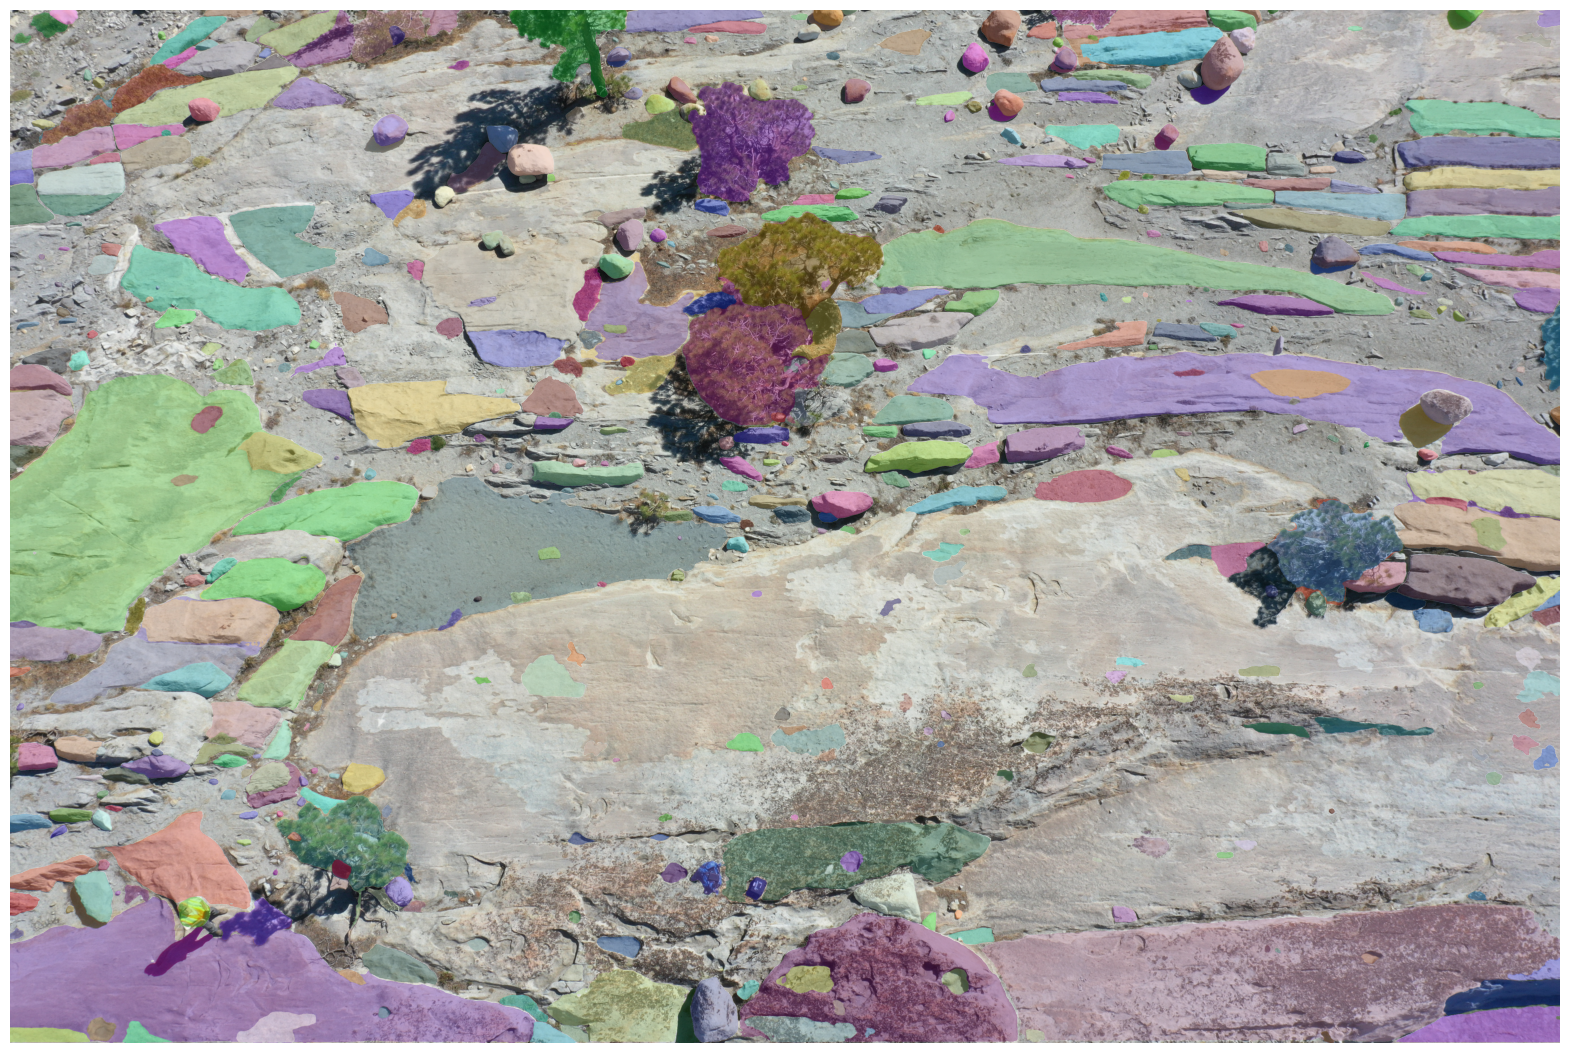

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show() 

In [23]:
len(masks2)

554

In [21]:
image_size = image.shape[:2]

sorted_anns = sorted(masks2, key=(lambda x: x['area']), reverse=True)

img = -np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1]))
for id, ann in enumerate(sorted_anns):
    m = ann['segmentation']
    img[m] = id

# resize img to the original size (self.image_size) using nearest neighbor interpolation
img = cv2.resize(img, (image_size[1], image_size[0]), interpolation=cv2.INTER_NEAREST)

# set the dtype to np.int16
img = img.astype(np.int16)

In [ ]:
def display_mask_with_id(mask, id):
    mask = np.where(mask == id, 1, 0)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.show()

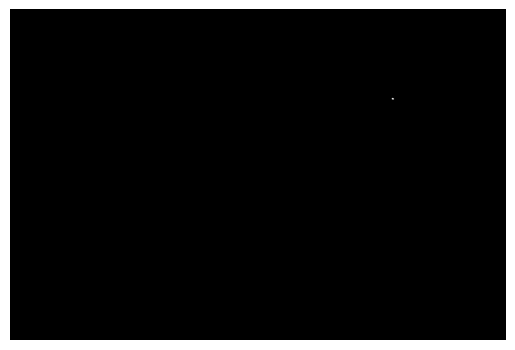

mask 541 area: 338


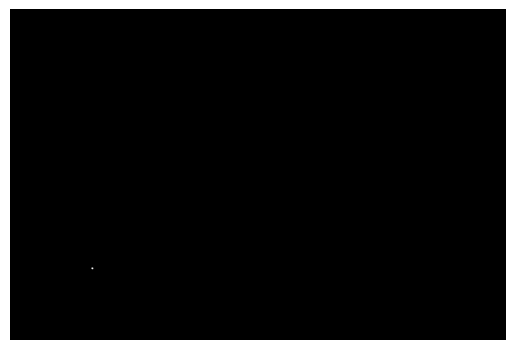

mask 542 area: 338


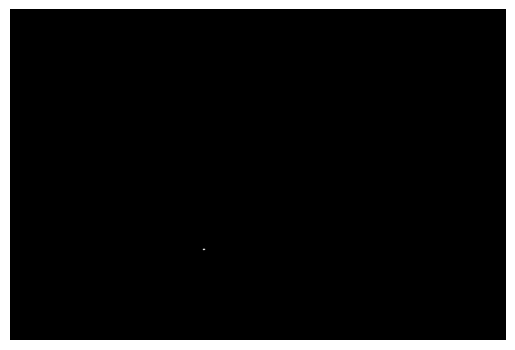

mask 543 area: 337


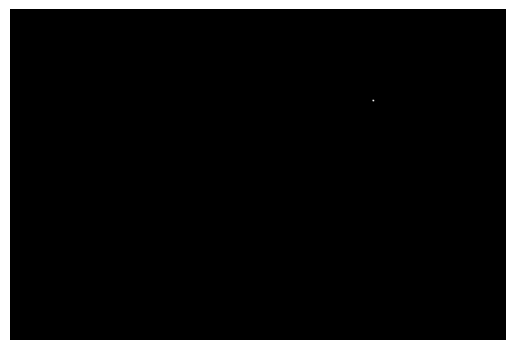

mask 544 area: 314


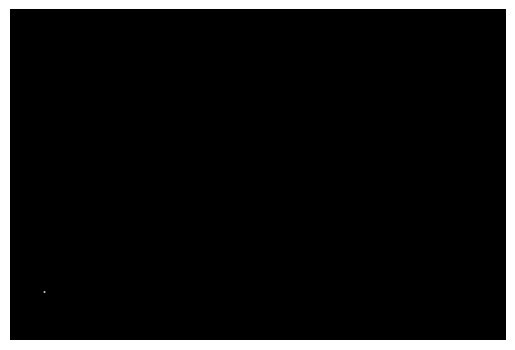

mask 545 area: 313


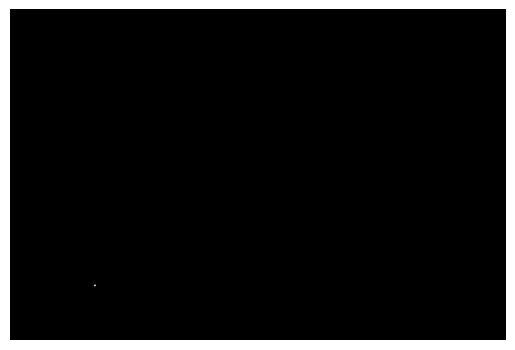

mask 546 area: 311


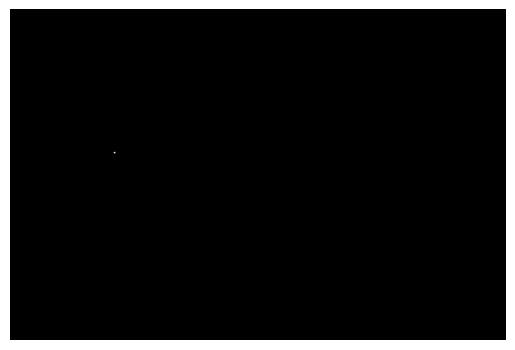

mask 547 area: 272


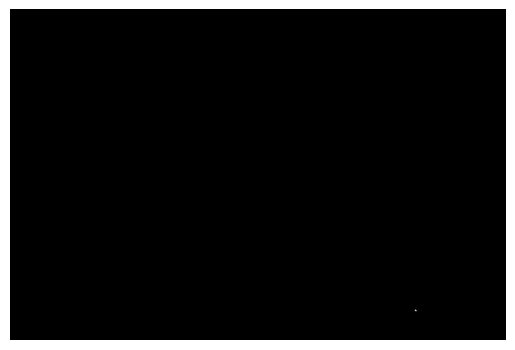

mask 548 area: 258


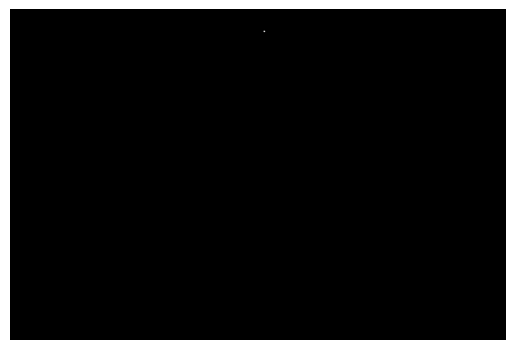

mask 549 area: 224


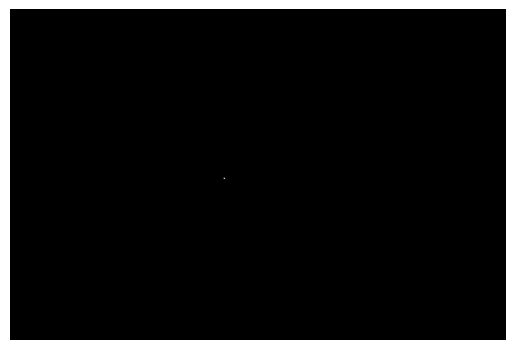

mask 550 area: 192


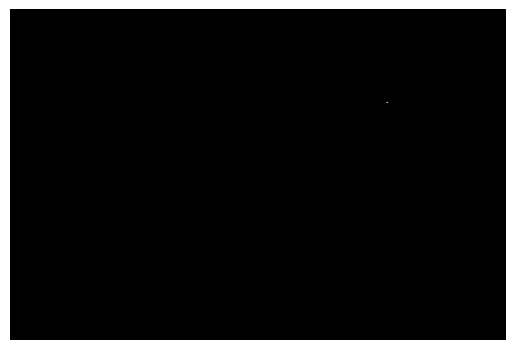

mask 551 area: 183


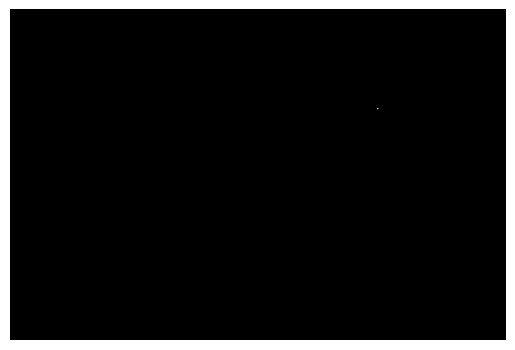

mask 552 area: 181


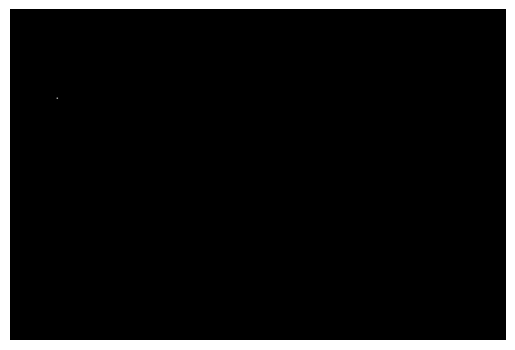

mask 553 area: 167


In [20]:
N = img.max() + 1
for i in range(N):
    display_mask_with_id(img, i)
    print(f"mask {i} area: {np.sum(img == i)}")